Mean:   635.83
Median: 650.50
Std:    114.45


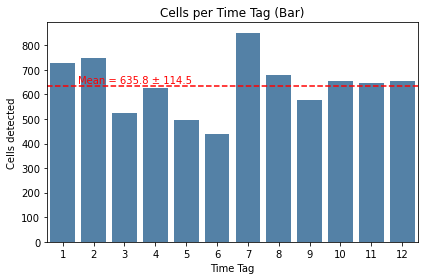

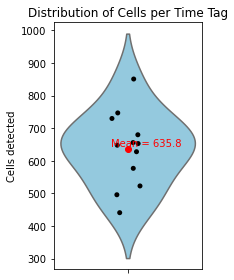

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV (replace with the correct path in the notebook)
df = pd.read_csv("scK562_TNFA_Replication.combined.dge.time_tags.csv.gz.time_tag_counts_summary.csv")

# Add explicit Time-Tag index (1-based)
df["Time_Tag"] = np.arange(1, len(df) + 1)

# Basic statistics
mean_val   = df["CELL BARCODES"].mean()
median_val = df["CELL BARCODES"].median()
std_val    = df["CELL BARCODES"].std(ddof=1)
print(f"Mean:   {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Std:    {std_val:.2f}")

# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x="Time_Tag", y="CELL BARCODES", data=df, color="steelblue")
plt.axhline(mean_val, ls="--", color="red")
plt.text(0.5, mean_val+10, f"Mean = {mean_val:.1f} ± {std_val:.1f}", color="red")
plt.xlabel("Time Tag")
plt.ylabel("Cells detected")
plt.title("Cells per Time Tag (Bar)")
plt.tight_layout()
plt.show()

# Violin plot
plt.figure(figsize=(3,4))
sns.violinplot(y=df["CELL BARCODES"], inner=None, color="skyblue")
sns.stripplot(y=df["CELL BARCODES"], color="black", size=5)
plt.scatter(0, mean_val, color="red", zorder=5)
plt.text(-0.1, mean_val+10, f"Mean = {mean_val:.1f}", color="red")
plt.ylabel("Cells detected")
plt.title("Distribution of Cells per Time Tag")
plt.tight_layout()
plt.show()


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Mean cells per Time-Tag: 635.8
Median cells per Time-Tag: 650.5
Standard deviation: 114.5


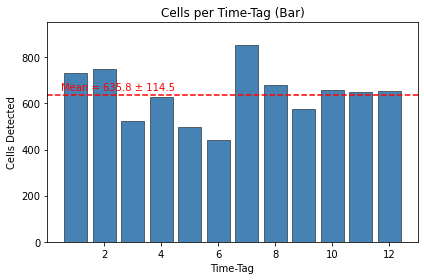

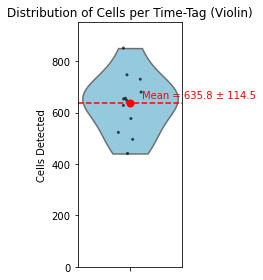

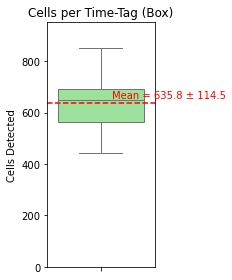

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Set publication-quality defaults
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 10
rcParams['axes.linewidth'] = 0.8
rcParams['xtick.major.width'] = 0.8
rcParams['ytick.major.width'] = 0.8
rcParams['xtick.direction'] = 'out'
rcParams['ytick.direction'] = 'out'
plt.rcParams['pdf.fonttype'] = 42  # For editable text in PDFs/SVGs

# Load data
df = pd.read_csv("scK562_TNFA_Replication.combined.dge.time_tags.csv.gz.time_tag_counts_summary.csv")
df["Time_Tag"] = np.arange(1, len(df) + 1)
cells = df["CELL BARCODES"].values

# Statistics
mean_val = np.mean(cells)
median_val = np.median(cells)
std_val = np.std(cells, ddof=1)
print(f"Mean cells per Time-Tag: {mean_val:.1f}")
print(f"Median cells per Time-Tag: {median_val:.1f}")
print(f"Standard deviation: {std_val:.1f}")

# Prepare figure parameters
dpi = 300
file_prefix = "time_tag_cells_"

# 1. Bar Plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(df["Time_Tag"], df["CELL BARCODES"], color="steelblue", edgecolor="black", linewidth=0.5)
ax.axhline(mean_val, ls="--", color="red", linewidth=1.5)
ax.text(0.5, mean_val + 20, f"Mean = {mean_val:.1f} ± {std_val:.1f}", color="red", fontsize=10, ha="left")
ax.set_xlabel("Time-Tag")
ax.set_ylabel("Cells Detected")
ax.set_title("Cells per Time-Tag (Bar)")
ax.set_ylim(0, max(cells) + 100)  # Add space for annotation
plt.tight_layout()
# Export
plt.savefig(f"{file_prefix}bar.png", dpi=dpi, bbox_inches="tight", format="png")
plt.savefig(f"{file_prefix}bar.svg", bbox_inches="tight", format="svg")
plt.show()
plt.close()

# 2. Violin Plot
fig, ax = plt.subplots(figsize=(3, 4))
sns.violinplot(y=cells, inner=None, color="skyblue", cut=0, ax=ax)
sns.stripplot(y=cells, color="black", size=3, alpha=0.7, ax=ax)
ax.axhline(mean_val, color="red", linestyle="--", linewidth=1.5)
ax.scatter(0, mean_val, color="red", s=50, zorder=5)
ax.text(0.1, mean_val + 20, f"Mean = {mean_val:.1f} ± {std_val:.1f}", color="red", fontsize=10, ha="left")
ax.set_ylabel("Cells Detected")
ax.set_title("Distribution of Cells per Time-Tag (Violin)")
ax.set_ylim(0, max(cells) + 100)  # Add space for annotation
plt.tight_layout()
# Export
plt.savefig(f"{file_prefix}violin.png", dpi=dpi, bbox_inches="tight", format="png")
plt.savefig(f"{file_prefix}violin.svg", bbox_inches="tight", format="svg")
plt.show()
plt.close()

# 3. Box Plot
fig, ax = plt.subplots(figsize=(3, 4))
sns.boxplot(y=cells, color="lightgreen", linewidth=1, ax=ax)
ax.axhline(mean_val, color="red", linestyle="--", linewidth=1.5)
ax.text(0.1, mean_val + 20, f"Mean = {mean_val:.1f} ± {std_val:.1f}", color="red", fontsize=10, ha="left")
ax.set_ylabel("Cells Detected")
ax.set_title("Cells per Time-Tag (Box)")
ax.set_ylim(0, max(cells) + 100)  # Add space for annotation
plt.tight_layout()
# Export
plt.savefig(f"{file_prefix}box.png", dpi=dpi, bbox_inches="tight", format="png")
plt.savefig(f"{file_prefix}box.svg", bbox_inches="tight", format="svg")
plt.show()
plt.close()
